# FoodPanda Recommendation Model: User Based Collaborative Filtering
--------
---------
## Explaination:
The cosine similarity of customers based on the cuisines they ordered and the quantities of the cuisine ordered are calculated and put into a matrix. When a customer ID is chosen for recommendation, the recommendation model pulls up the most similar customers ranked by their cosine similarity score and then generates the cuisines and order quantity from the similar customers, then cuts off the recommendations at the top 3 cuisines. The model excludes order quantities of 1 for the cuisine recommendation as ordering a cuisine once is not enough to demonstrate preference to a cuisine. The dataset only had 3 columns, hence this is why the collaborative filtering recommendation system was chosen over content based filtering which is more complex however it requires user-features and item features and the current data lacks attributes of the cuisines and the customer. 


In [2]:

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt



The data has been seperately exported into an excel file. Converting to dataframe and retrieving basic info on the dataset.



In [3]:
df = pd.read_excel('cuisinerec.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cuisine           939 non-null    object
 1   Numbers of order  939 non-null    int64 
 2   Customer_id       939 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.1+ KB


### Overview of data and renaming columns for standardization.

In [4]:
df.head()

df.rename(columns={'Numbers of order': 'OrderQty','cuisine': 'Cuisine','Customer_id': 'CustomerID'}, inplace=True)


Checking Nulls, Duplicates and Unique Customers/Cuisines


In [5]:
df.isnull().any()


Cuisine       False
OrderQty      False
CustomerID    False
dtype: bool

In [6]:
df.duplicated().sum()

0

In [7]:
df['CustomerID'].nunique()

df['Cuisine'].nunique()

37

Creating a visualization of total orders per cuisine type: Chinese, Singaporean and Fast Food are the most ordered

[Text(0.5, 1.0, 'Distribution of Cuisine Orders')]

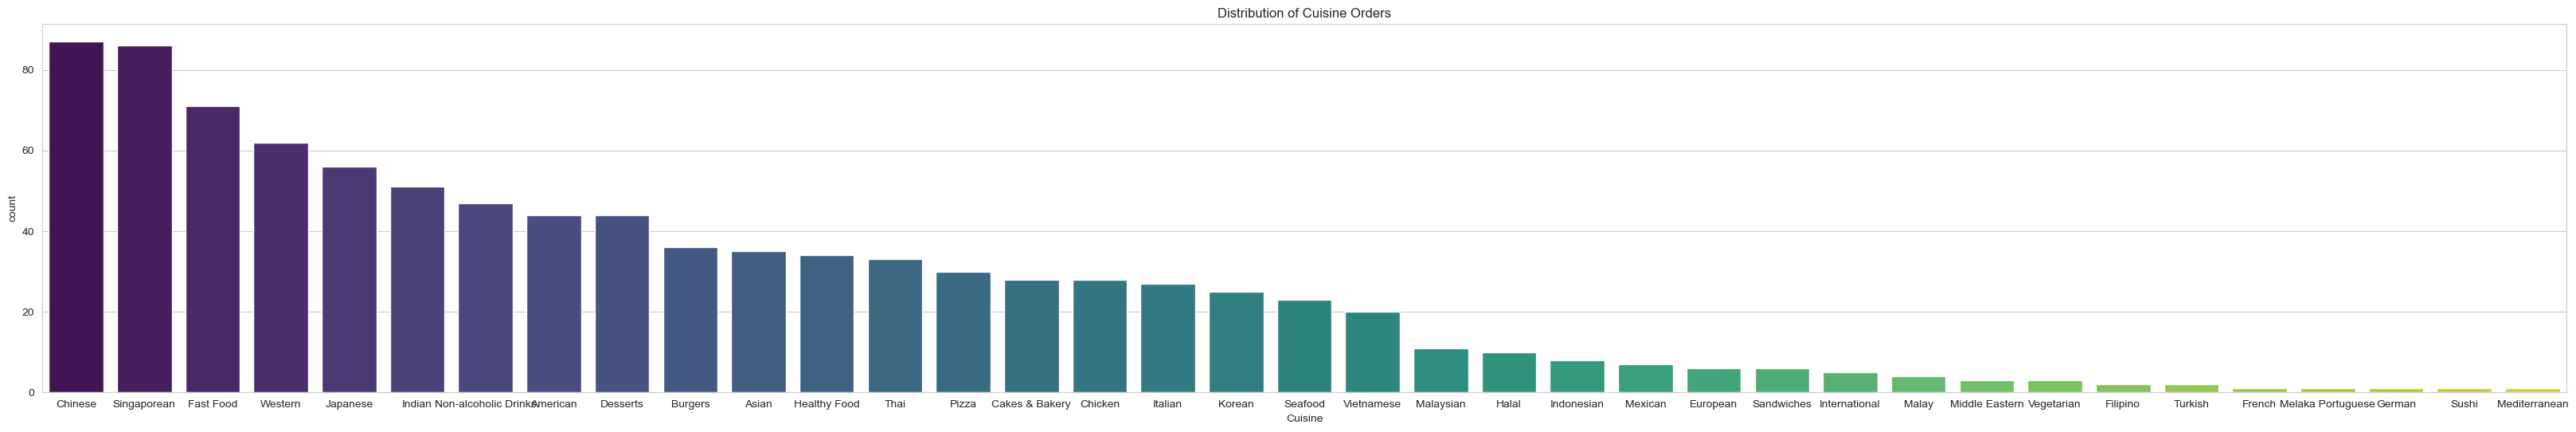

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(90,6))

plt.subplot(1,2,1)
ax = sns.countplot(x="Cuisine", data=df, palette="viridis",order=df['Cuisine'].value_counts().index)
ax.set(title="Distribution of Cuisine Orders")

### Creating a matrix with Customer IDs and Cuisine Types

In [9]:
matrix = df.pivot_table(index='CustomerID', columns='Cuisine', values='OrderQty')
matrix


Cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,NaN,2.0,NaN,4.0,1.0,NaN,10.0,NaN,...,5.0,NaN,NaN,7.0,NaN,1.0,NaN,NaN,2.0,1.0
2,6.0,NaN,6.0,NaN,NaN,11.0,NaN,NaN,2.0,NaN,...,2.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,1.0,4.0
3,1.0,NaN,5.0,2.0,1.0,6.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,3.0,2.0
4,2.0,NaN,NaN,1.0,NaN,6.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,1.0
5,4.0,2.0,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2.0,NaN,NaN,NaN,2.0,25.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,7.0,NaN,NaN,NaN
97,1.0,NaN,1.0,NaN,1.0,6.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
98,NaN,NaN,NaN,NaN,NaN,12.0,6.0,NaN,2.0,NaN,...,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0


Filling the missing 'NaN' values with 0 as we are creating a cosine similarity matrix and they need to be populated

In [10]:
fill_matrix= cosine_similarity(matrix.fillna(0))
similarity_matrix= pd.DataFrame(fill_matrix)
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.645151,0.408325,0.702472,0.395639,0.599877,0.516932,0.529785,0.513016,0.619764,...,0.655626,0.581216,0.766646,0.349154,0.480876,0.554974,0.103798,0.446216,0.571735,0.543384
1,0.645151,1.000000,0.733449,0.829775,0.474008,0.815453,0.834027,0.778598,0.699152,0.708269,...,0.851679,0.806703,0.286267,0.371434,0.768848,0.697941,0.213258,0.551764,0.551848,0.673996
2,0.408325,0.733449,1.000000,0.517047,0.410167,0.506587,0.665165,0.781272,0.598964,0.323029,...,0.603296,0.616917,0.144642,0.310183,0.609714,0.584308,0.228528,0.604205,0.540186,0.619434
3,0.702472,0.829775,0.517047,1.000000,0.408597,0.876351,0.804355,0.663198,0.680182,0.841958,...,0.828434,0.761503,0.528204,0.509807,0.779080,0.633294,0.123628,0.492312,0.467565,0.598920
4,0.395639,0.474008,0.410167,0.408597,1.000000,0.331565,0.391426,0.407475,0.280632,0.443999,...,0.527100,0.383429,0.393900,0.109777,0.698339,0.335832,0.250167,0.357594,0.408432,0.416459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.554974,0.697941,0.584308,0.633294,0.335832,0.516095,0.861844,0.899964,0.435764,0.291711,...,0.633058,0.917200,0.267408,0.153131,0.609786,1.000000,0.211145,0.713024,0.775740,0.945897
96,0.103798,0.213258,0.228528,0.123628,0.250167,0.077170,0.203237,0.289460,0.086300,0.068780,...,0.234497,0.210769,0.010999,0.018196,0.291129,0.211145,1.000000,0.204860,0.219601,0.217186
97,0.446216,0.551764,0.604205,0.492312,0.357594,0.434915,0.689282,0.808836,0.398564,0.217359,...,0.554851,0.714165,0.191238,0.108953,0.583007,0.713024,0.204860,1.000000,0.688698,0.722910
98,0.571735,0.551848,0.540186,0.467565,0.408432,0.319774,0.658002,0.791865,0.345973,0.241547,...,0.509237,0.800199,0.342774,0.094379,0.524102,0.775740,0.219601,0.688698,1.000000,0.799201


Updating the index with matching Customer IDs

In [11]:
similarity_matrix.columns = matrix.index
similarity_matrix['CustomerID'] = matrix.index
similarity_matrix = similarity_matrix.set_index('CustomerID')

similarity_matrix.head()

CustomerID,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.645151,0.408325,0.702472,0.395639,0.599877,0.516932,0.529785,0.513016,0.619764,...,0.655626,0.581216,0.766646,0.349154,0.480876,0.554974,0.103798,0.446216,0.571735,0.543384
2,0.645151,1.000000,0.733449,0.829775,0.474008,0.815453,0.834027,0.778598,0.699152,0.708269,...,0.851679,0.806703,0.286267,0.371434,0.768848,0.697941,0.213258,0.551764,0.551848,0.673996
3,0.408325,0.733449,1.000000,0.517047,0.410167,0.506587,0.665165,0.781272,0.598964,0.323029,...,0.603296,0.616917,0.144642,0.310183,0.609714,0.584308,0.228528,0.604205,0.540186,0.619434
4,0.702472,0.829775,0.517047,1.000000,0.408597,0.876351,0.804355,0.663198,0.680182,0.841958,...,0.828434,0.761503,0.528204,0.509807,0.779080,0.633294,0.123628,0.492312,0.467565,0.598920
5,0.395639,0.474008,0.410167,0.408597,1.000000,0.331565,0.391426,0.407475,0.280632,0.443999,...,0.527100,0.383429,0.393900,0.109777,0.698339,0.335832,0.250167,0.357594,0.408432,0.416459


Creating a function to show the top 3 recommended cuisines for a certain Customer ID

In [25]:
#For easy comprehension, the customer_id put into the function will be refered as input customer in the explainations below
def cuisine_recommender(similarity_matrix,customer_id):
    #Retrieving top 5 similar customers of input customer 
    customer_similarity = similarity_matrix.loc[customer_id]
    #Order the similar customers from highest cosine similarity
    customer_similarity = customer_similarity.sort_values(ascending=False)
    #Removing customer with similarity of 1 which would be input customer 
    customer_similarity = customer_similarity[customer_similarity != 1]
    # Showing only Top 5 Customer IDs 
    top_5_similar_customers = customer_similarity.head(5)
    # Return Index of CustomerIDs
    indexoftop5= top_5_similar_customers.index
    # Find the cuisines already ordered by input customer
    existing_cuisines = matrix.loc[customer_id][matrix.loc[customer_id]>0].sort_values(ascending=False).index
    
    #Create an empty list to be populated with recommended new cuisines
    recommended_cuisines = []
    #Create a loop that retrieves the cuisines of similar customers
    for i in indexoftop5:
        # Get cuisines of each customer ID in the indexoftop5 that have a OrderQty > 1 
        # 1 order would be just a first try and does not indicate that the customer likes the cuisine yet
        # Repeated orders would be a better signifier that the customer liked the cuisine
        # Cuisines are sorted by order quantity by each customer by highest to lowest similarity scores
        customercuisines = matrix.loc[i][matrix.loc[i] > 1].sort_values(ascending=False)
        # Remove cuisines already ordered by input customer 
        unique_cuisine = customercuisines[~customercuisines.index.isin(existing_cuisines)].sort_values(ascending=False)
        recommended_cuisines.append(unique_cuisine)

    
    #There will be duplicates of cuisines in this list through the loop iterations.
    # They can be dropped in the final recommendations list to show unique recommended cuisines based on similar customers
    # First occurence of the cuisine will be kept as they are from customers with higher similarity to input customer
    final_recommendation = pd.concat(recommended_cuisines)
    final_recommendation = final_recommendation[~final_recommendation.index.duplicated(keep='first')]
    final_recommendation= final_recommendation.head(3)
    return final_recommendation


###Testing with customer ID: 30
cuisine_recommender(similarity_matrix,30)



Cuisine
American      2.0
Japanese      3.0
Sandwiches    3.0
dtype: float64